INTRODUCTION
The sinking of the Titanic was both a bad and famous ship accident in history. It happened in 1912. The Titanic sank as a result of hitting an iceberg. 1502 people died and there were 2224 people on the ship, including the crew.
Content:
1. [Upload and Check Data.](#1)
2. [Variable Description.](#2)
3. [Univariate Variable Analysis.](#3)
4. [Basic Data Analysis.](#4)
5. [Outlier Ditection.](#5)
6. [Missing Value.](#6)

In [1]:


import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Set style using seaborn's API
sns.set_style("whitegrid")

# Display file paths in the kaggle/input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv
/kaggle/input/dataset/gender_submission.csv


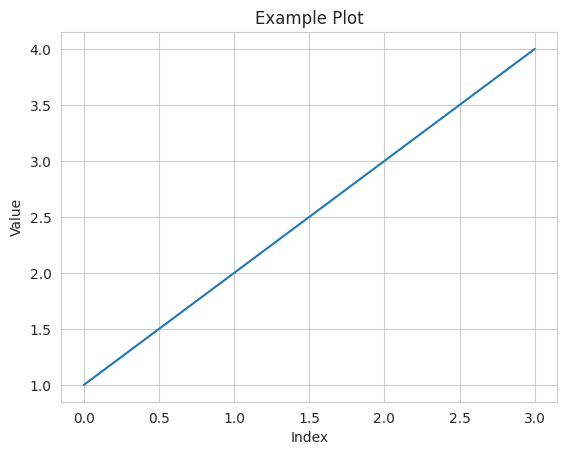

In [2]:
a = [1, 2, 3, 4]  # converted set to list for plotting
plt.plot(a)
plt.title("Example Plot")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


# LOAD AND CHECK DATA.

In [3]:
train_df = pd.read_csv("/kaggle/input/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/dataset/test.csv")
test_PassengerId = test_df["PassengerId"]

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
# Variable description.
1. PassengerId: unique id number to each passenger
2. Survived : passenger survivr(1) or died(0)
3. Pclass :passenger class
4. Name
5. Sex 
6. Age
7. SibSp: number of siblings/spouses 
8. Parch :number of parents or clildren
9. Ticket
10. Fare: amount money for ticket
11. Cabin
12. Embarked : port where(C=Cherbourg, Q= Queenstown, S= Southampton)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


float64(2): Fare,Age

int64(5): PassengerId,Survived,Pclass,SibSp,Parch

object(5): Name,Sex,Ticket,Cabin,Embarked.

<a id = "3"></a><br>
# Univariate Variable Analysis
Categorical or Numerical Variable Analysis

Categorical :Seçenekli demek örnek Survived,sex,pclass,embarked,cabin,name,ticket,sibsp,parch.

Numerical: age,passengerıd and fare.

In [8]:
def bar_plot(variable):
    # Input: variable, e.g., "Sex"
    # Output: bar plot & value count
    # Get feature
    var = train_df[variable]
    # Count number of categorical variable (value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize=(9, 3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index)  # Corrected this line
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable, varValue))



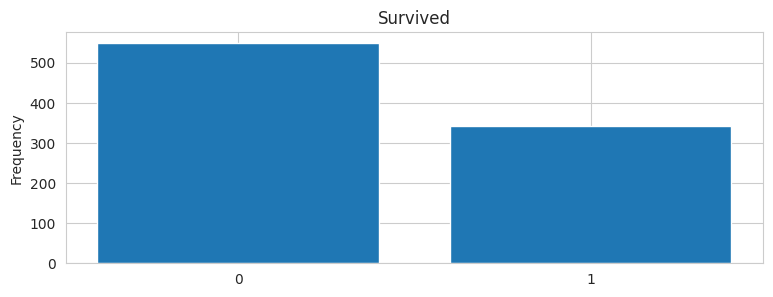

Survived: 
Survived
0    549
1    342
Name: count, dtype: int64


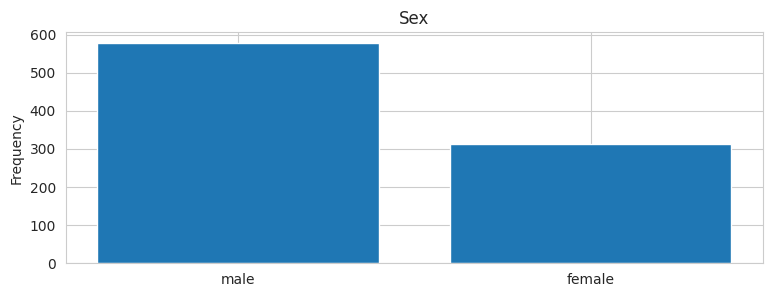

Sex: 
Sex
male      577
female    314
Name: count, dtype: int64


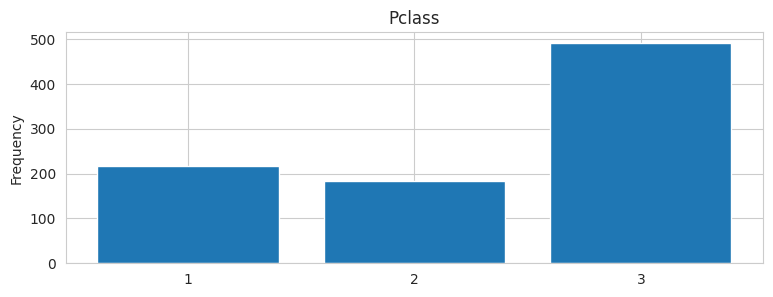

Pclass: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


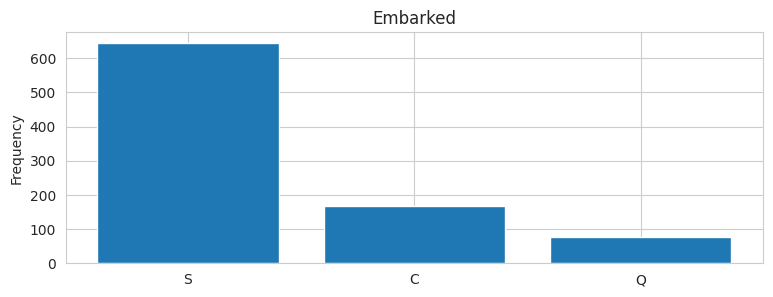

Embarked: 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


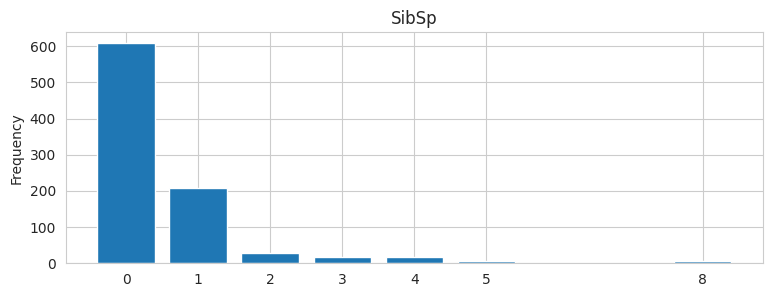

SibSp: 
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


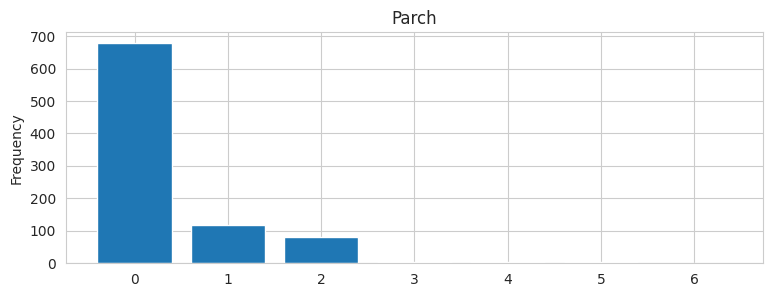

Parch: 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [9]:
# Define the categories
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

# Plot the bar plots for each category
for c in category1:
    bar_plot(c)

In [10]:
category2 = ["Cabin", "Name" , "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))
    

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



# NUMERİCAL

histogram bizim veri setimizdeki herhangi bir topluluğun gösterimidir.

In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

histogram çizimi için fonksiyon ayarlamalarını yaptık.

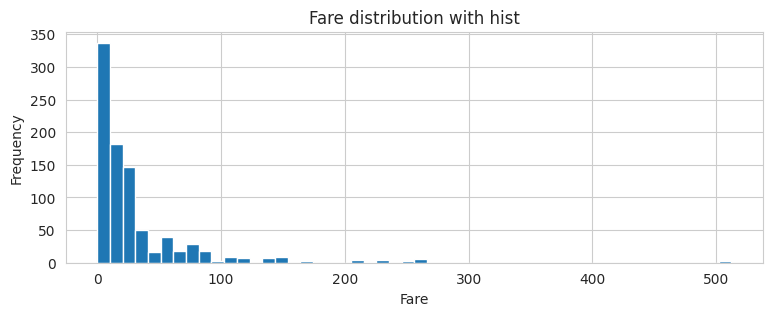

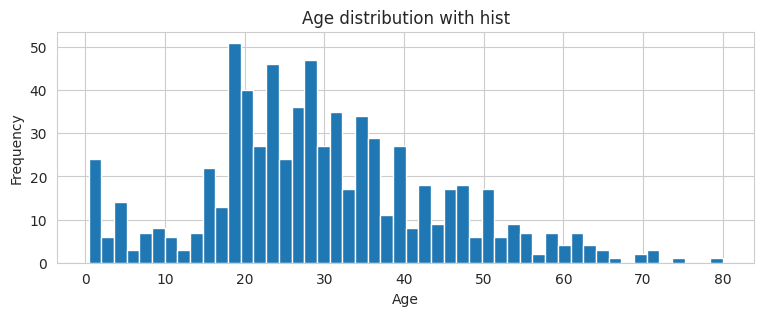

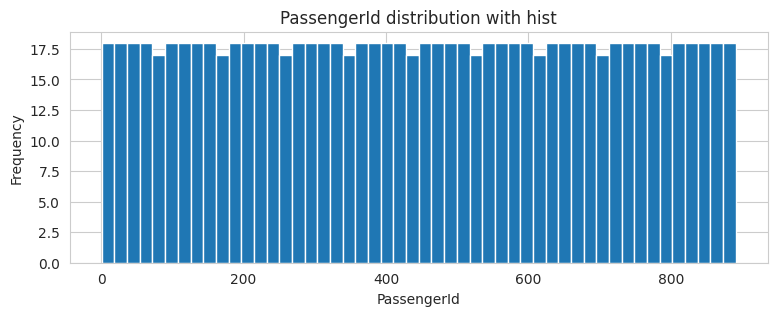

In [12]:
numericVar = ["Fare","Age","PassengerId"]
for n in numericVar :
    plot_hist(n)

numeric değerlerimizi verdik yani veri steimizdeki column ları ve sonucunda bize bunların sayısal değerlerinden oluşan grafik verdi.

<a id = "4"></a><br>
 # Basic Data Analysis
pclass-survived

sex-survived

sibsp-survived

parch-survived

In [13]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


pclassa göre survive oranlarının ortalamasını yazdırdık . ama sıralı değil aşarıda survive feature nu azalan olarak sıralama kodu;

In [14]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


1. sınıf insanların hayatta kalma oranı daha fazla

In [15]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


kadın hayatta kalma oranı daha yüksek olmuş

In [16]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


sayı 3 ten fazla ise hayatta kalma oranı azalmıış

<a id = "5"></a><br>
# Outlier Ditection

outlier elimizde olan elde edilen veriyi bozan veri demektir.İstatiksel anlamda karar vermekte zorlandırır.

In [18]:
def detect_outliers(df,features):
 outlier_indices = []
 for c in features:
    #1st quartile
    Q1 = np.percentile(df[c],25)
    #3rd quertile
    Q3 = np.percentile(df[c],75)
    #IOR
    IOR = Q3-Q1
    #Outlier step
    outlier_step = IOR *1.5
    #detect outlier and their indeces
    outlier_list_col = df[(df[c] < Q1 - outlier_step )|( df[c] > Q3 + outlier_step)].index
    #store indeces
    outlier_indices.extend(outlier_list_col)
 outlier_indices = Counter(outlier_indices)
 multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
 return multiple_outliers

sayısal featurelar için outlier bulunması ve adetinin bulunması.

In [19]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
#drop outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis=0).reset_index(drop = True)


<a id = "5"></a><br>
# MİSSİNG VALUE

Find Missing Value

Fill Missing Value

In [21]:
train_df_len = len(train_df)
train_df =pd.concat([train_df,test_df],axis =0).reset_index(drop =True)

test ile birleştirdik

# FİND MİSSİNG

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

hangi data frame lerde null değer var kolonları tespit ettik

In [23]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

# FİLL MİSSİNG 

embarked 2

fare 1


In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


bu iki yolcunun nereden bindikleri belli değil.

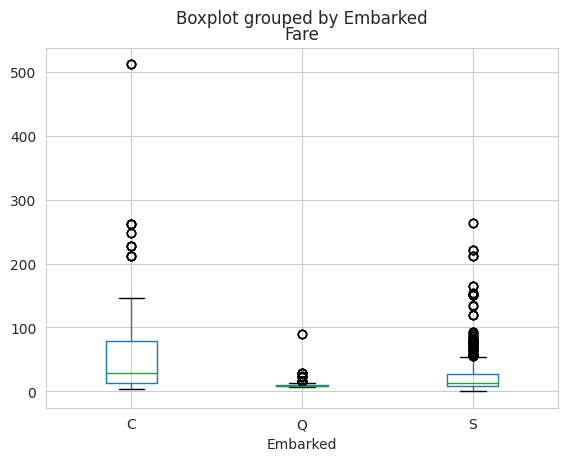

In [25]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [26]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


boş olanları C ile doldur dedik çünkü muhtemelen C limanından bindi 80 fare ödeyenler.

In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [29]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
